# Projeto Final - Beatriz Farias

## Importação de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from scipy.stats import pearsonr
%matplotlib inline

## Carregando os datasets

In [2]:
chromecast_data = pd.read_csv('dataset_chromecast.csv')

chromecast_data.head(10)

,device_id,date_hour,bytes_up,bytes_down
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918
1,66161985,2021-09-06 00:02:00,685.935484,328.258065
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516
3,66161985,2021-09-06 00:04:00,776.133333,229.200000
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000
5,66161985,2021-09-06 00:06:00,753.573770,212.983607
6,66161985,2021-09-06 00:07:00,3456.903226,41277.806452
7,66161985,2021-09-06 00:08:00,2833.032258,583.225806
8,66161985,2021-09-06 00:09:00,1808.786885,27278.819672
9,66161985,2021-09-06 00:10:00,634.754098,281.442623


In [3]:
smart_tv_data = pd.read_csv('dataset_smart-tv.csv')

smart_tv_data.head(10)

,device_id,date_hour,bytes_up,bytes_down
0,77209603,2021-11-22 15:23:00,132932.983607,2.818140e+06
1,77209603,2021-11-22 15:24:00,115770.491803,2.264410e+06
2,77209603,2021-11-22 15:25:00,114030.032787,2.309270e+06
3,77209603,2021-11-22 15:26:00,97170.622951,2.006544e+06
4,77209603,2021-11-22 15:27:00,39569.573770,8.061440e+05
5,77209603,2021-11-22 15:28:00,46449.442623,8.192375e+05
6,77209603,2021-11-22 15:29:00,117661.333333,2.223721e+06
7,77209603,2021-11-22 15:30:00,115463.868852,2.515149e+06
8,77209603,2021-11-22 15:31:00,78223.344262,1.658853e+06
9,77209603,2021-11-22 15:32:00,68273.600000,1.586183e+06


In [4]:
chromecast_data['bytes_up'] = chromecast_data['bytes_up'] + 1
chromecast_data['bytes_down'] = chromecast_data['bytes_down'] + 1

chromecast_data['bytes_up'] = np.log10(chromecast_data['bytes_up'])
chromecast_data['bytes_down'] = np.log10(chromecast_data['bytes_down'])

smart_tv_data['bytes_up'] = smart_tv_data['bytes_up'] + 1
smart_tv_data['bytes_down'] = smart_tv_data['bytes_down'] + 1

smart_tv_data['bytes_up'] = np.log10(smart_tv_data['bytes_up'])
smart_tv_data['bytes_down'] = np.log10(smart_tv_data['bytes_down'])

In [5]:
chromecast_data.head(10)

,device_id,date_hour,bytes_up,bytes_down
0,66161985,2021-09-06 00:01:00,3.475383,4.691848
1,66161985,2021-09-06 00:02:00,2.836916,2.517536
2,66161985,2021-09-06 00:03:00,3.652720,4.578812
3,66161985,2021-09-06 00:04:00,2.890496,2.362105
4,66161985,2021-09-06 00:05:00,3.488877,4.713136
5,66161985,2021-09-06 00:06:00,2.877702,2.330381
6,66161985,2021-09-06 00:07:00,3.538813,4.615727
7,66161985,2021-09-06 00:08:00,3.452405,2.766581
8,66161985,2021-09-06 00:09:00,3.257627,4.435841
9,66161985,2021-09-06 00:10:00,2.803289,2.450930


In [6]:
smart_tv_data.head(10)

,device_id,date_hour,bytes_up,bytes_down
0,77209603,2021-11-22 15:23:00,5.123636,6.449963
1,77209603,2021-11-22 15:24:00,5.063602,6.354955
2,77209603,2021-11-22 15:25:00,5.057023,6.363475
3,77209603,2021-11-22 15:26:00,4.987539,6.302449
4,77209603,2021-11-22 15:27:00,4.597372,5.906413
5,77209603,2021-11-22 15:28:00,4.666990,5.913410
6,77209603,2021-11-22 15:29:00,5.070637,6.347080
7,77209603,2021-11-22 15:30:00,5.062450,6.400564
8,77209603,2021-11-22 15:31:00,4.893342,6.219808
9,77209603,2021-11-22 15:32:00,4.834259,6.200354


In [7]:
def calculate_bins(data):
    N = len(data)
    return round(1 + 3.3 * np.log10(N))

## Estatísticas Gerais - Chromecast

In [8]:
print(f"Mean: {chromecast_data['bytes_up'].mean():.3f}")
print(f"Standard Deviation: {chromecast_data['bytes_up'].std():.3f}")
print(f"Variance: {chromecast_data['bytes_up'].var():.3f}")

Mean: 3.350
Standard Deviation: 0.678
Variance: 0.460


In [9]:
print(f"Mean: {chromecast_data['bytes_down'].mean():.3f}")
print(f"Standard Deviation: {chromecast_data['bytes_down'].std():.3f}")
print(f"Variance: {chromecast_data['bytes_down'].var():.3f}")

Mean: 3.800
Standard Deviation: 1.290
Variance: 1.664


### Histogramas

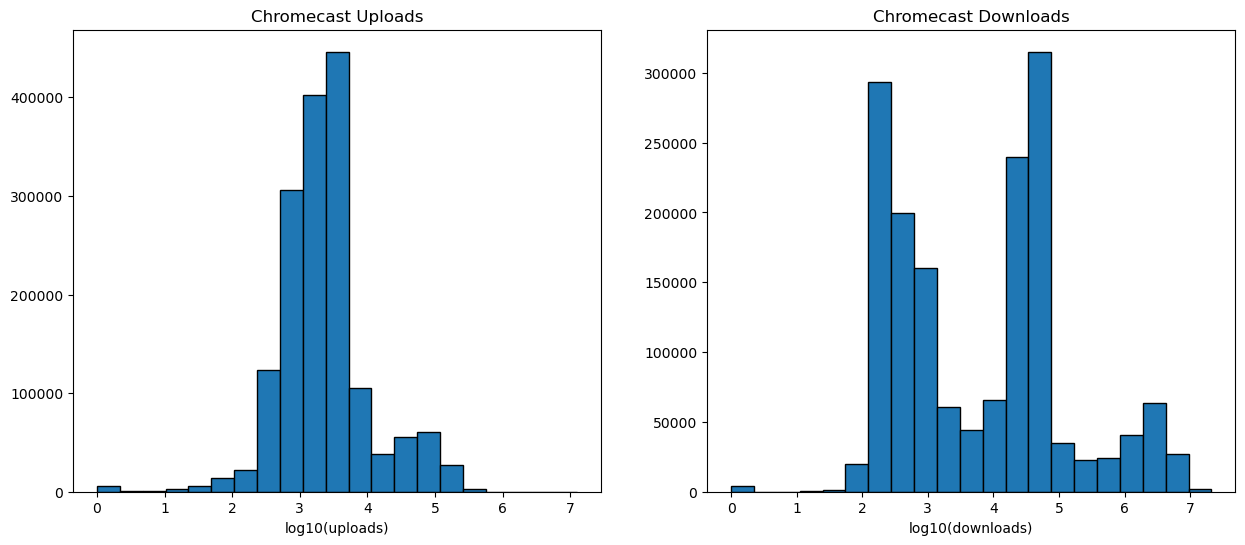

In [10]:
plt.figure(figsize= [15, 6])
bins = calculate_bins(chromecast_data['bytes_up'])

# Chromecast upload
plt.subplot(1, 2, 1)
plt.title('Chromecast Uploads')
plt.xlabel('log10(uploads)')
plt.hist(data= chromecast_data, x = 'bytes_up', bins = bins, edgecolor = "black");

# Chromecast download
plt.subplot(1, 2, 2)
plt.title('Chromecast Downloads')
plt.xlabel('log10(downloads)')
plt.hist(data= chromecast_data, x = 'bytes_down', bins = bins, edgecolor = "black");

### Box Plots 

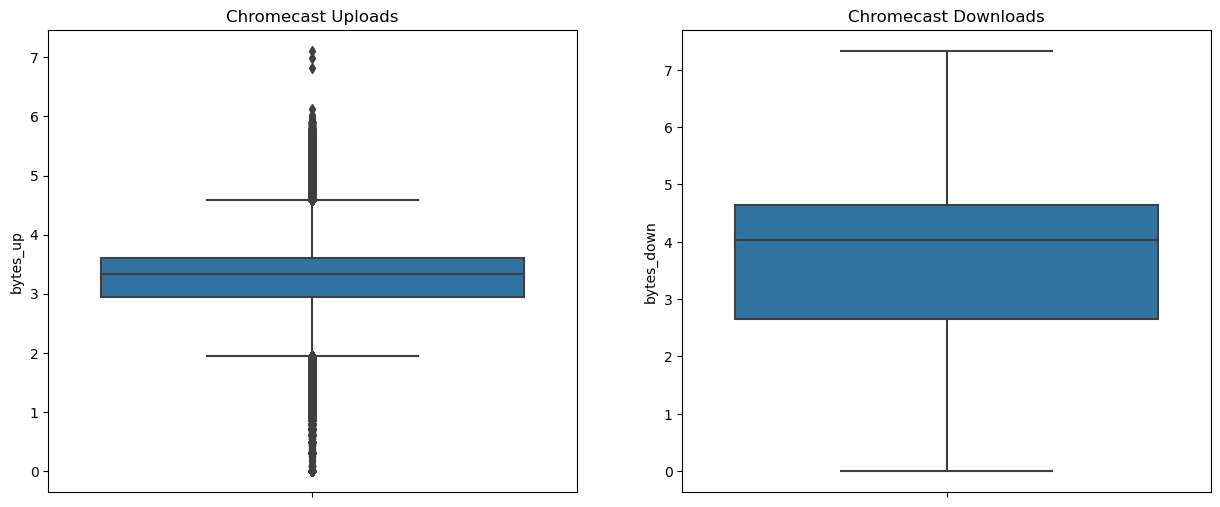

In [11]:
plt.figure(figsize= [15, 6])

# Chromecast upload
plt.subplot(1, 2, 1)
plt.title('Chromecast Uploads')
sb.boxplot(data= chromecast_data, y = 'bytes_up');

# Chromecast download
plt.subplot(1, 2, 2)
plt.title('Chromecast Downloads')
sb.boxplot(data= chromecast_data, y = 'bytes_down');

### Função de distribuição empírica

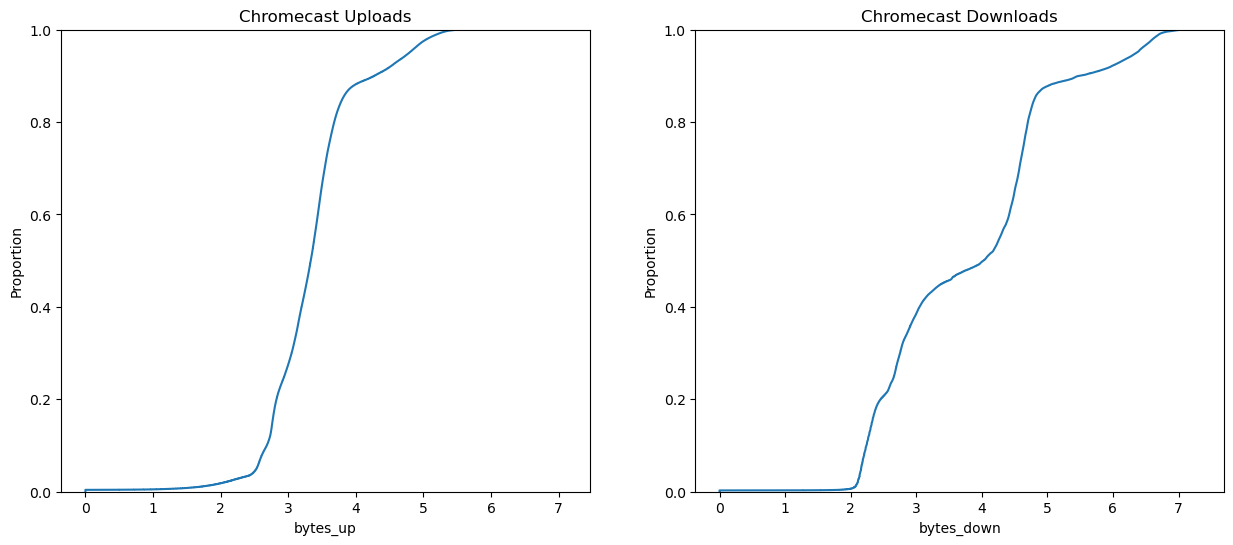

In [12]:
plt.figure(figsize= [15, 6])

# Chromecast upload
plt.subplot(1, 2, 1)
plt.title('Chromecast Uploads')
sb.ecdfplot (data = chromecast_data, x = 'bytes_up');

# Chromecast download
plt.subplot(1, 2, 2)
plt.title('Chromecast Downloads')
sb.ecdfplot (data = chromecast_data, x = 'bytes_down');

## Estatísticas Gerais - Smart TV

In [13]:
print(f"Mean: {smart_tv_data['bytes_up'].mean():.3f}")
print(f"Standard Deviation: {smart_tv_data['bytes_up'].std():.3f}")
print(f"Variance: {smart_tv_data['bytes_up'].var():.3f}")

Mean: 2.158
Standard Deviation: 2.027
Variance: 4.110


In [14]:
print(f"Mean: {smart_tv_data['bytes_down'].mean():.3f}")
print(f"Standard Deviation: {smart_tv_data['bytes_down'].std():.3f}")
print(f"Variance: {smart_tv_data['bytes_down'].var():.3f}")

Mean: 2.352
Standard Deviation: 2.593
Variance: 6.721


### Histogramas 

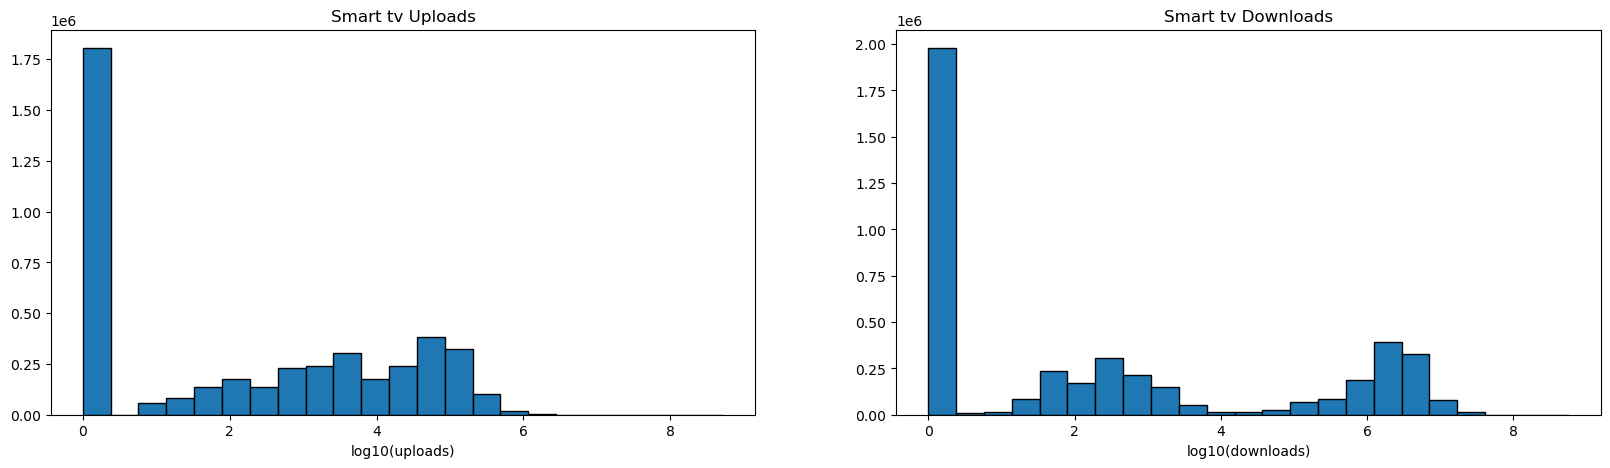

In [15]:
plt.figure(figsize= [20, 5])
bins = calculate_bins(smart_tv_data['bytes_up'])

# Smart tv upload
plt.subplot(1, 2, 1)
plt.title('Smart tv Uploads')
plt.xlabel('log10(uploads)')
plt.hist(data= smart_tv_data, x = 'bytes_up', bins = bins, edgecolor = "black");

# Smart tv download
plt.subplot(1, 2, 2)
plt.title('Smart tv Downloads')
plt.xlabel('log10(downloads)')
plt.hist(data= smart_tv_data, x = 'bytes_down', bins = bins, edgecolor = "black");

### Box Plots

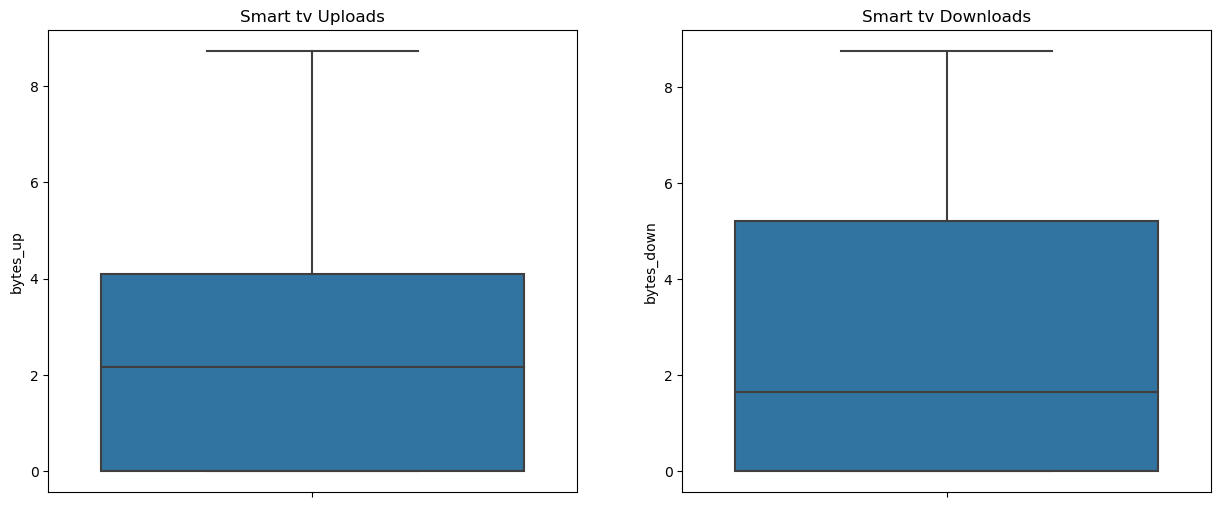

In [16]:
plt.figure(figsize= [15, 6])

# Smart tv upload
plt.subplot(1, 2, 1)
plt.title('Smart tv Uploads')
sb.boxplot(data= smart_tv_data, y = 'bytes_up');

# Smart tv download
plt.subplot(1, 2, 2)
plt.title('Smart tv Downloads')
sb.boxplot(data= smart_tv_data, y = 'bytes_down');

### Função de distribuição empírica

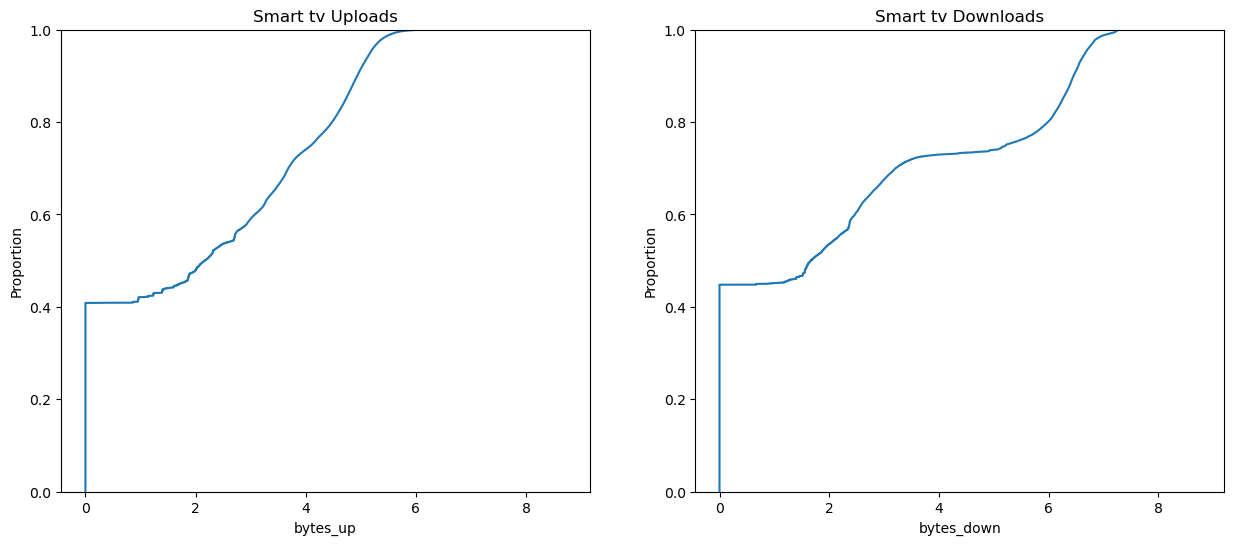

In [17]:
plt.figure(figsize= [15, 6])

# Smart tv upload
plt.subplot(1, 2, 1)
plt.title('Smart tv Uploads')
sb.ecdfplot (data = smart_tv_data, x = 'bytes_up');

# Smart tv download
plt.subplot(1, 2, 2)
plt.title('Smart tv Downloads')
sb.ecdfplot (data = smart_tv_data, x = 'bytes_down');

## Estatísticas por horário 

In [18]:
# New column: hour
chromecast_data['hour'] = chromecast_data['date_hour'].apply(
    lambda x: int(x.split(' ')[1].split(':')[0]))

chromecast_data.head(3)

,device_id,date_hour,bytes_up,bytes_down,hour
0,66161985,2021-09-06 00:01:00,3.475383,4.691848,0
1,66161985,2021-09-06 00:02:00,2.836916,2.517536,0
2,66161985,2021-09-06 00:03:00,3.652720,4.578812,0


In [19]:
# New column: hour

smart_tv_data['hour'] = smart_tv_data['date_hour'].apply(
    lambda x: int(x.split(' ')[1].split(':')[0]))

smart_tv_data.head(3)

,device_id,date_hour,bytes_up,bytes_down,hour
0,77209603,2021-11-22 15:23:00,5.123636,6.449963,15
1,77209603,2021-11-22 15:24:00,5.063602,6.354955,15
2,77209603,2021-11-22 15:25:00,5.057023,6.363475,15


### Chromecast box plots

C:\Users\saira\AppData\Local\Temp\ipykernel_28884\4146413422.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[8, 4])


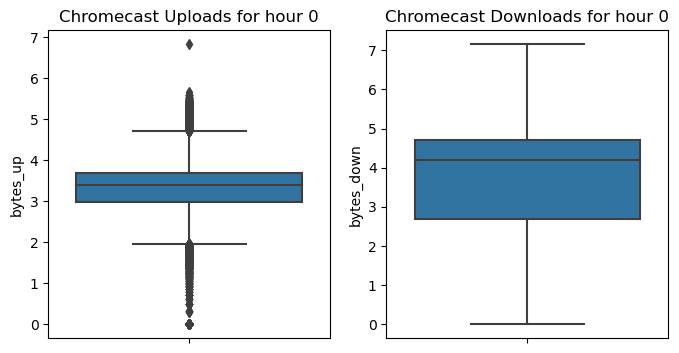

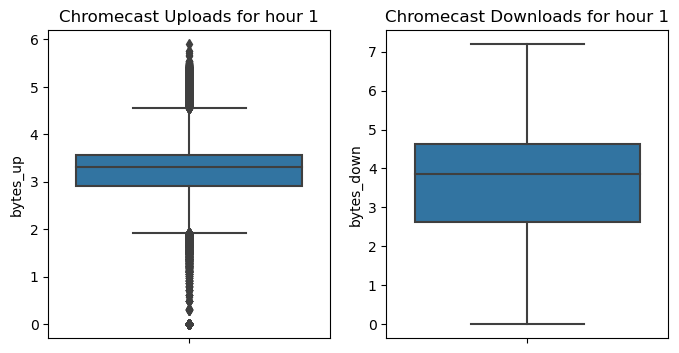

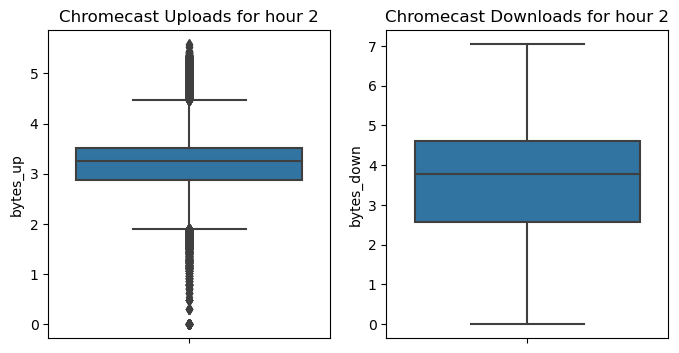

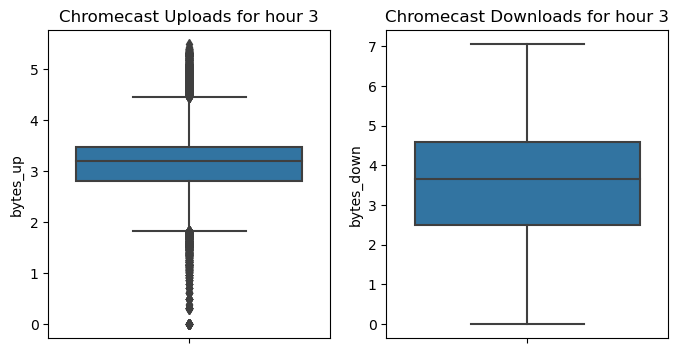

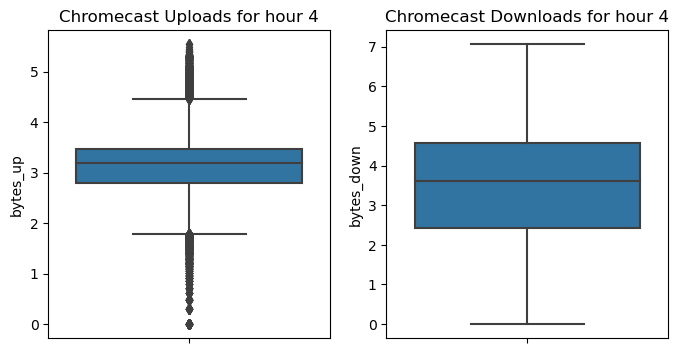

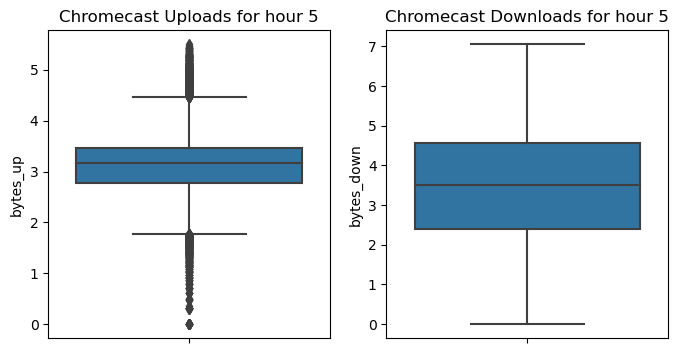

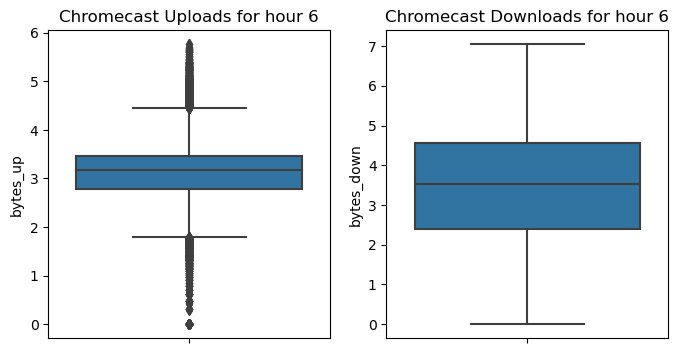

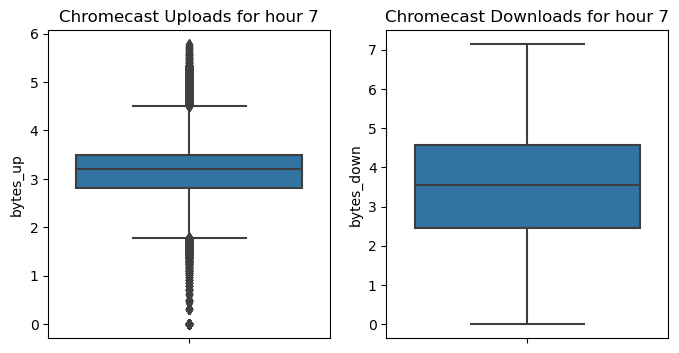

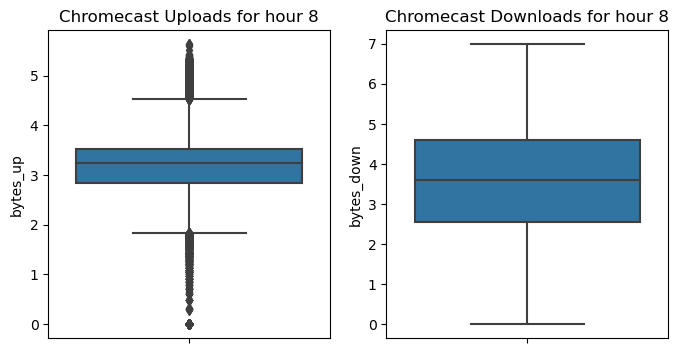

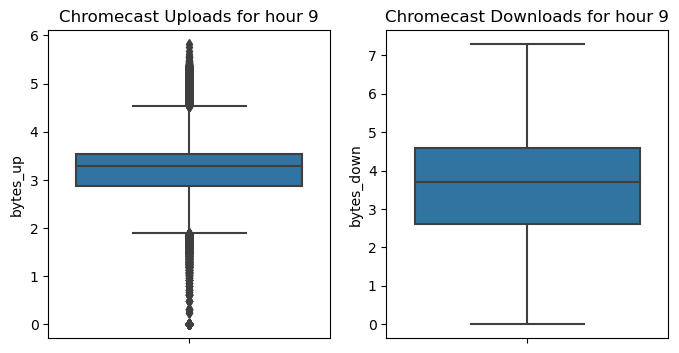

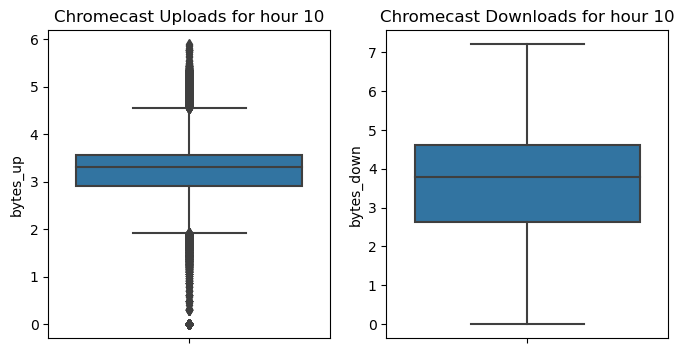

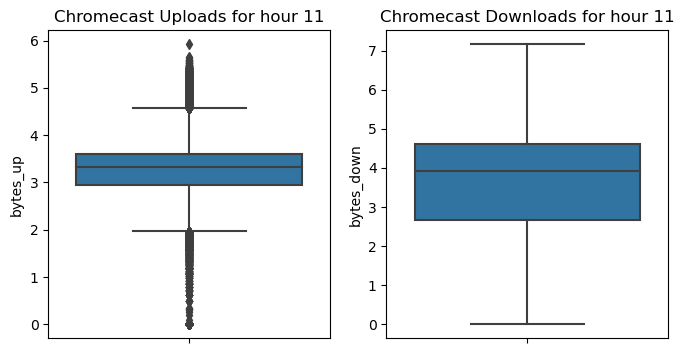

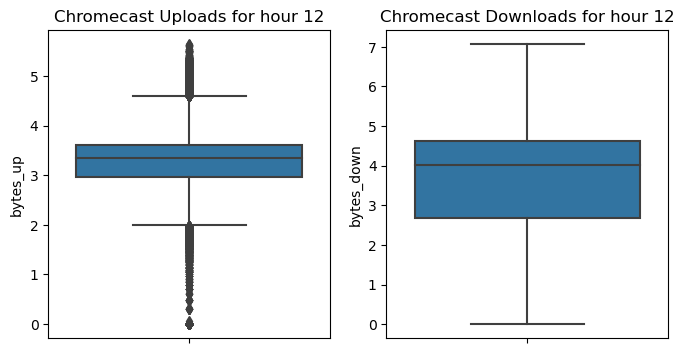

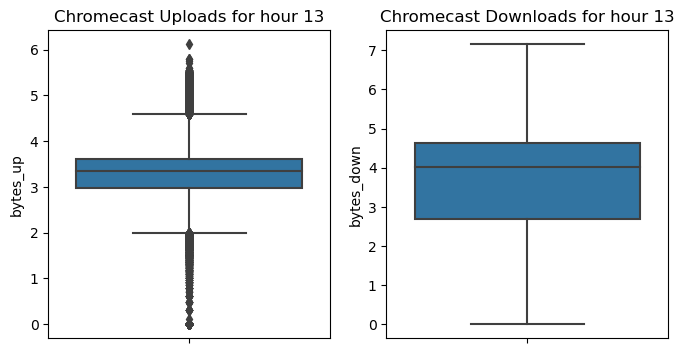

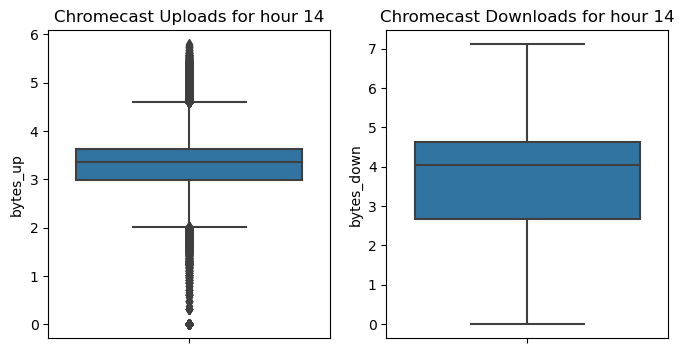

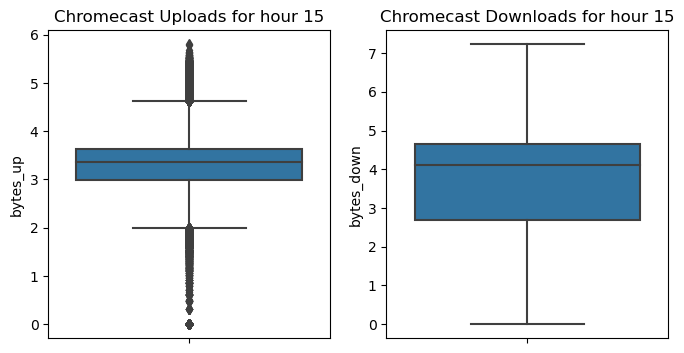

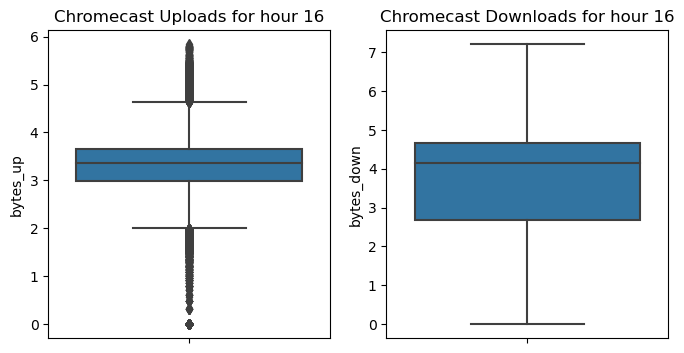

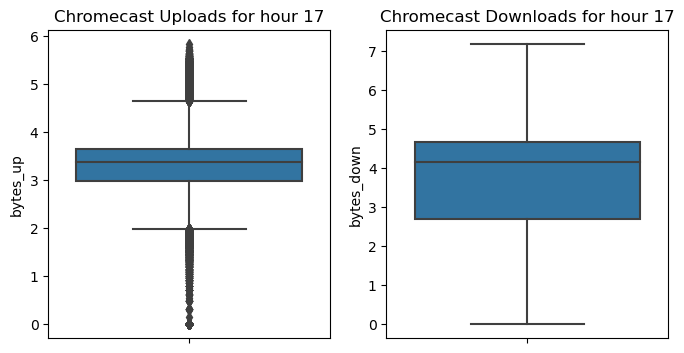

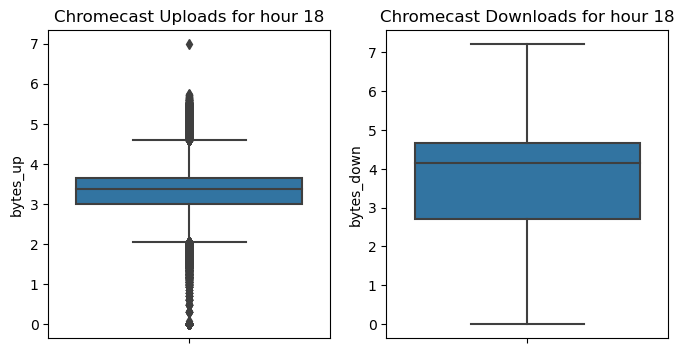

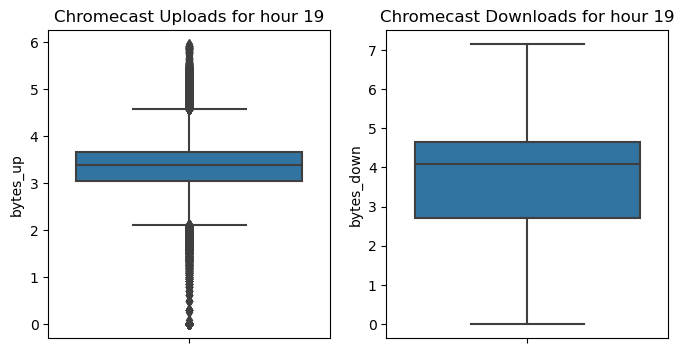

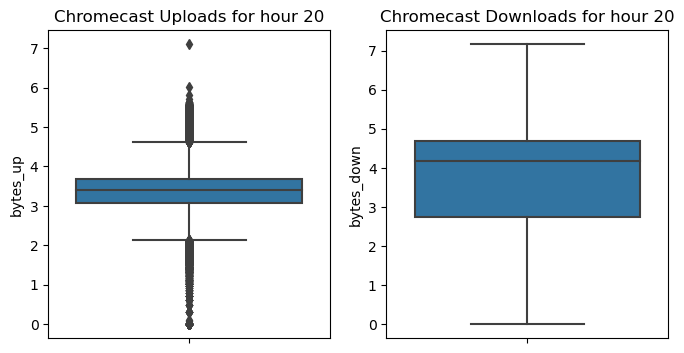

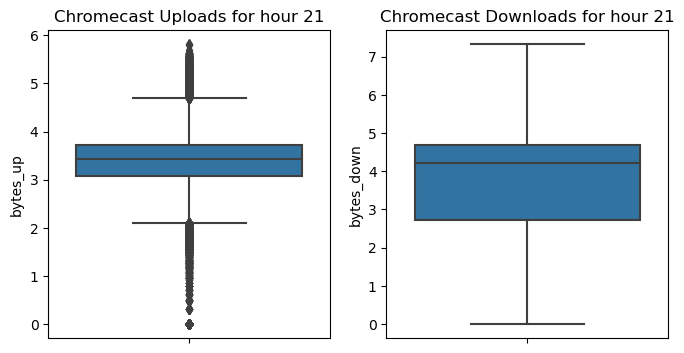

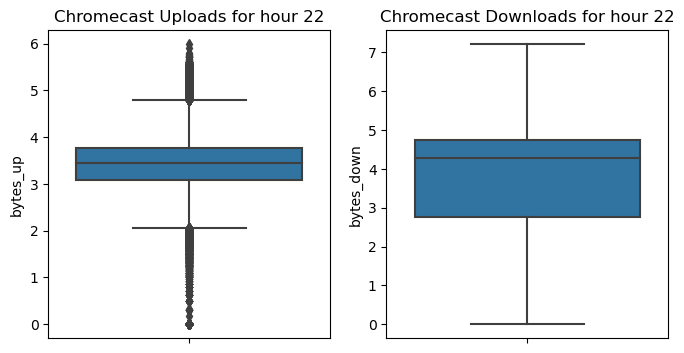

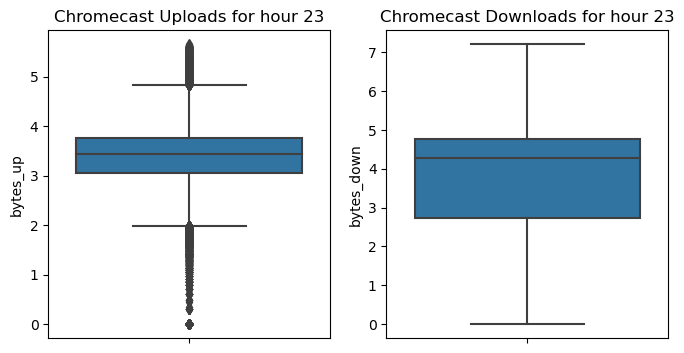

In [20]:
for hour in range(24):
    plt.figure(figsize=[8, 4])
    data = chromecast_data[chromecast_data['hour'] == hour]
    
    plt.subplot(1, 2, 1)
    plt.title(f'Chromecast Uploads for hour {hour}')
    sb.boxplot(data, y = 'bytes_up');
    
    plt.subplot(1, 2, 2)
    plt.title(f'Chromecast Downloads for hour {hour}')
    sb.boxplot(data, y = 'bytes_down');

### Smart TV box plots 

C:\Users\saira\AppData\Local\Temp\ipykernel_28884\3991006373.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[8, 4])


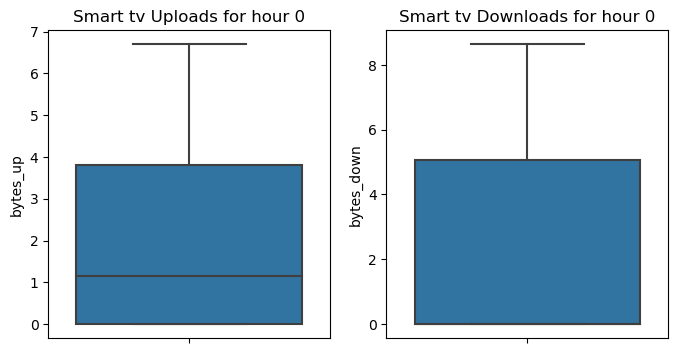

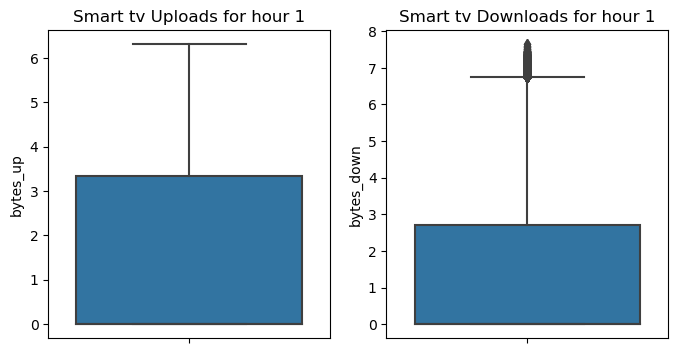

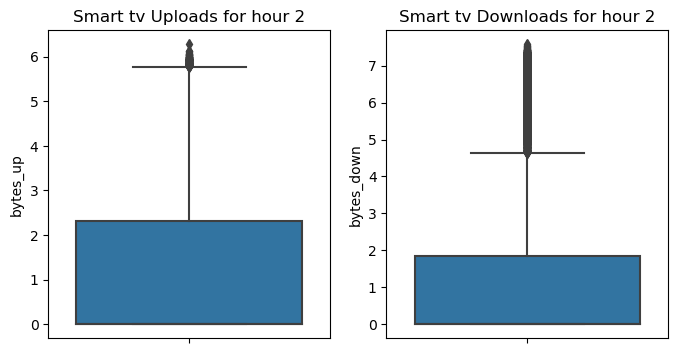

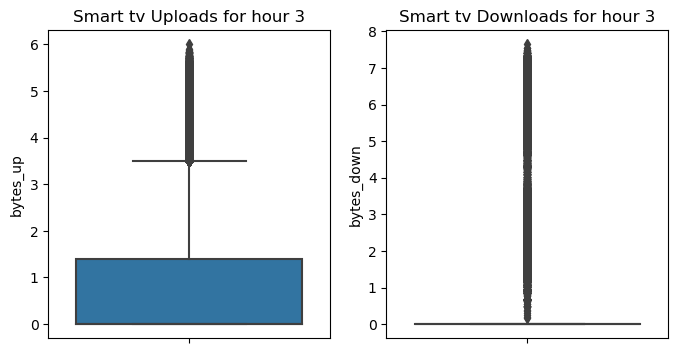

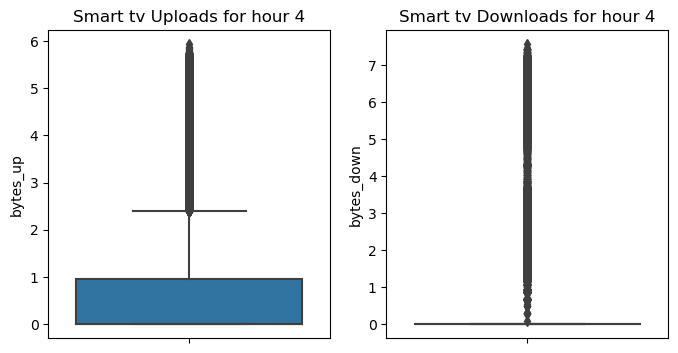

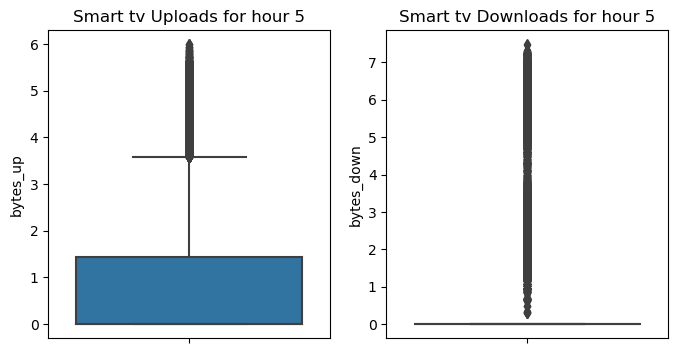

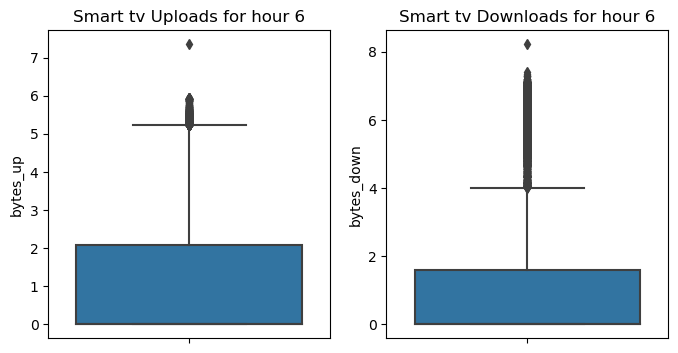

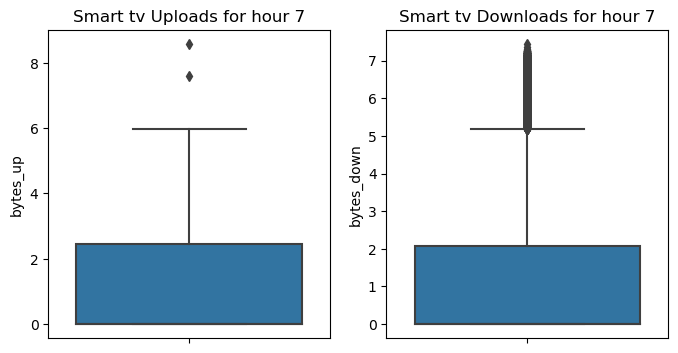

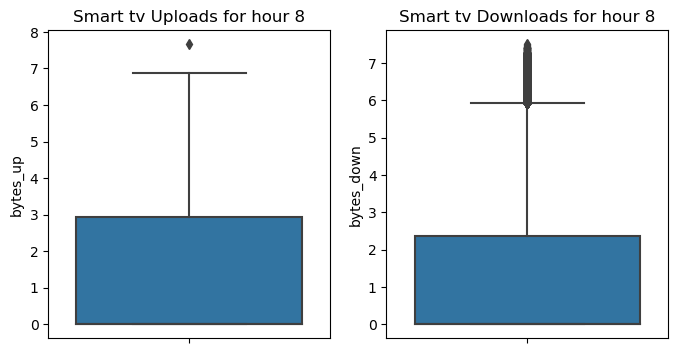

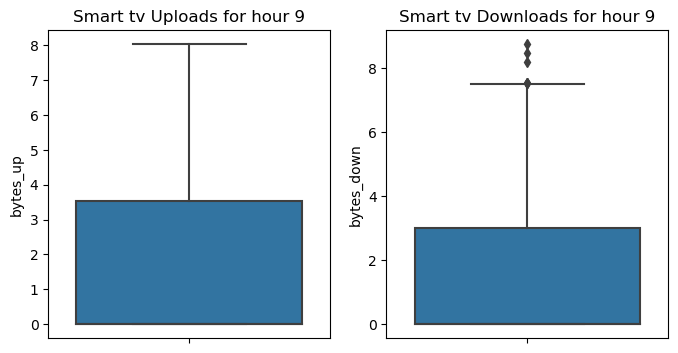

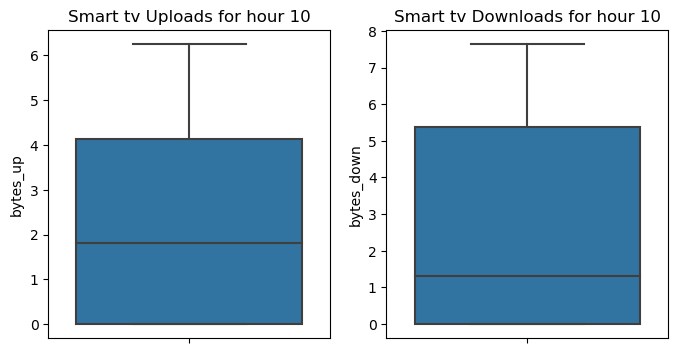

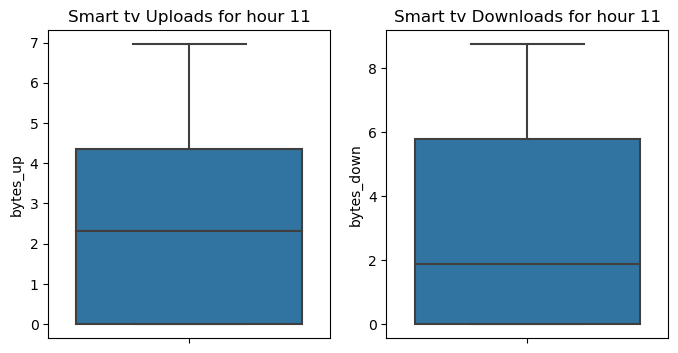

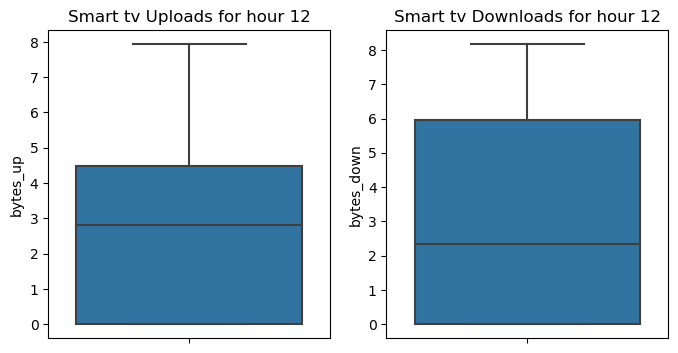

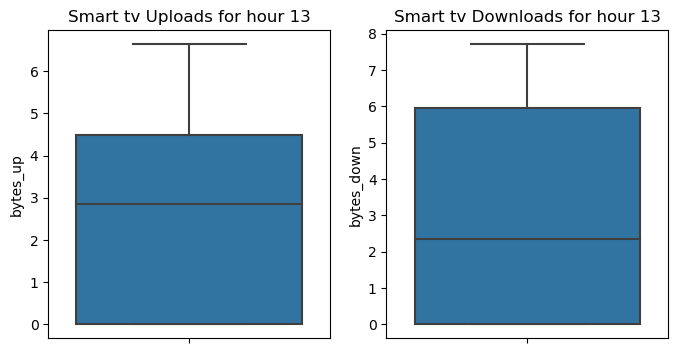

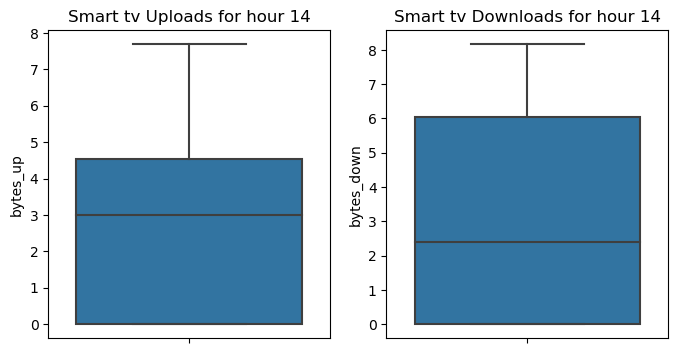

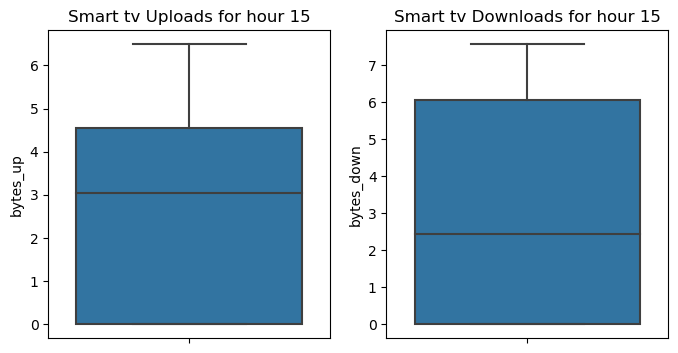

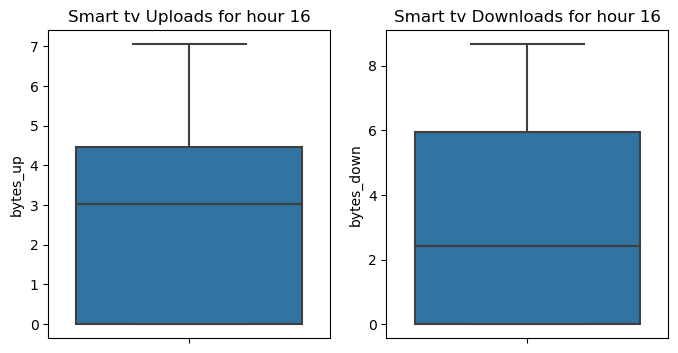

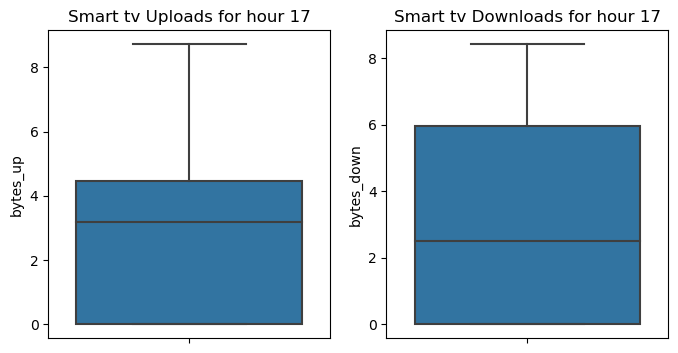

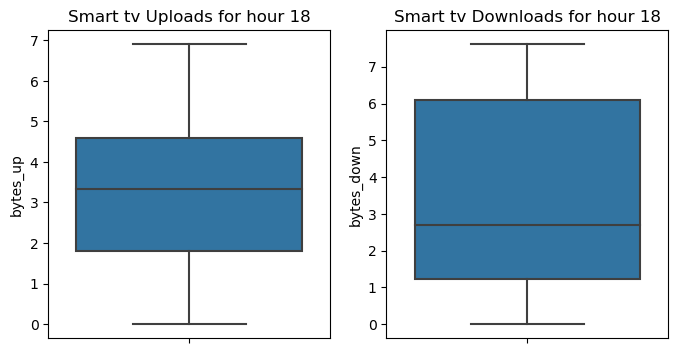

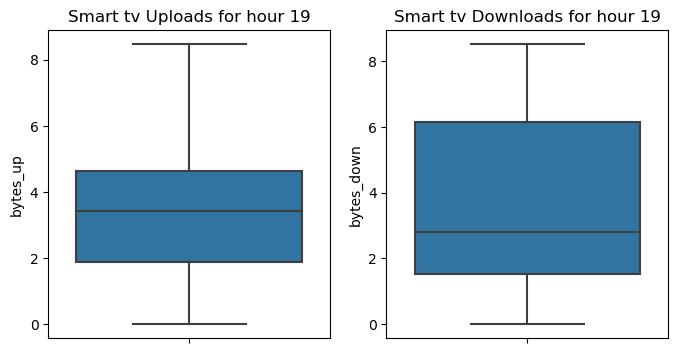

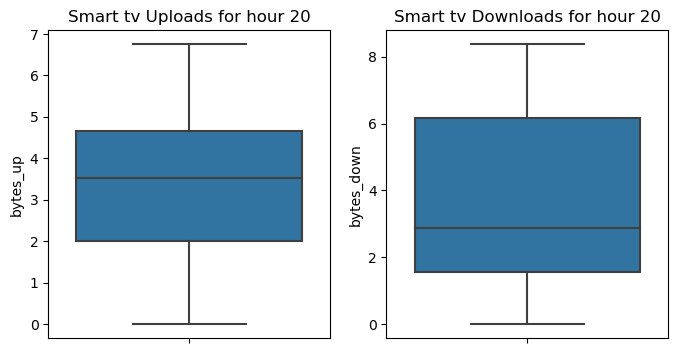

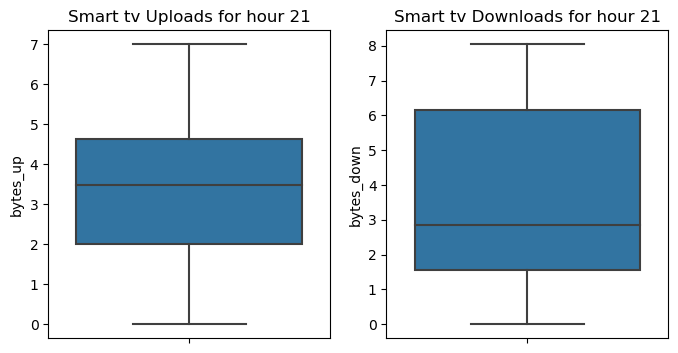

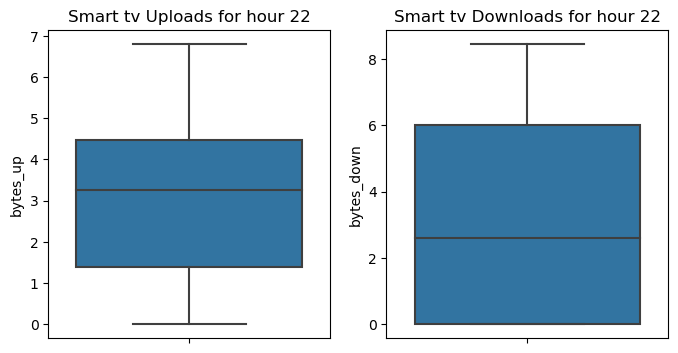

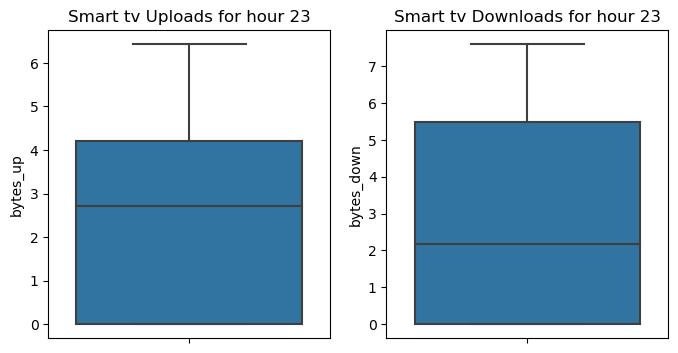

In [21]:
for hour in range(24):
    plt.figure(figsize=[8, 4])
    data = smart_tv_data[smart_tv_data['hour'] == hour]
    
    plt.subplot(1, 2, 1)
    plt.title(f'Smart tv Uploads for hour {hour}')
    sb.boxplot(data, y = 'bytes_up');
    
    plt.subplot(1, 2, 2)
    plt.title(f'Smart tv Downloads for hour {hour}')
    sb.boxplot(data, y = 'bytes_down');

### Média, desvio padrão e variância - Chromecast

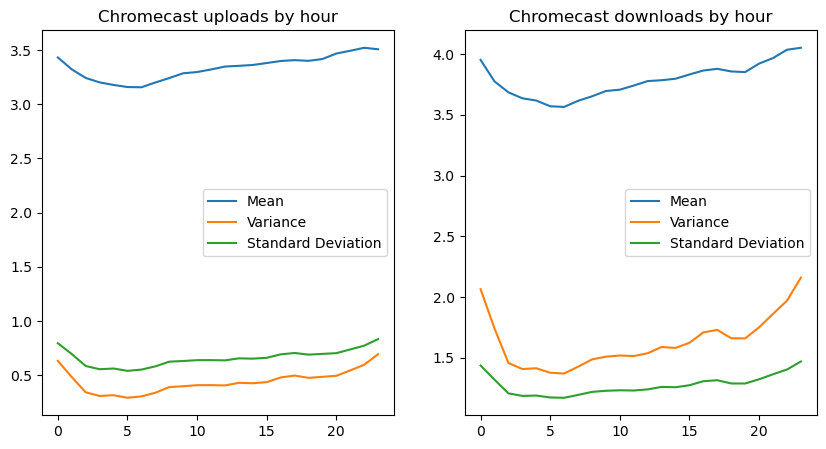

In [22]:
plt.figure(figsize= [10, 5])

chromecast_by_hour = chromecast_data.groupby('hour')

plt.subplot(1,2,1)
plt.title('Chromecast uploads by hour')
plt.plot(chromecast_by_hour['bytes_up'].mean(), label= 'Mean');
plt.plot(chromecast_by_hour['bytes_up'].var(), label= 'Variance');
plt.plot(chromecast_by_hour['bytes_up'].std(), label= 'Standard Deviation');
plt.legend();

plt.subplot(1,2,2)
plt.title('Chromecast downloads by hour')
plt.plot(chromecast_by_hour['bytes_down'].mean(), label= 'Mean');
plt.plot(chromecast_by_hour['bytes_down'].var(), label= 'Variance');
plt.plot(chromecast_by_hour['bytes_down'].std(), label= 'Standard Deviation');
plt.legend();

### Média, desvio padrão e variância - Smart TV

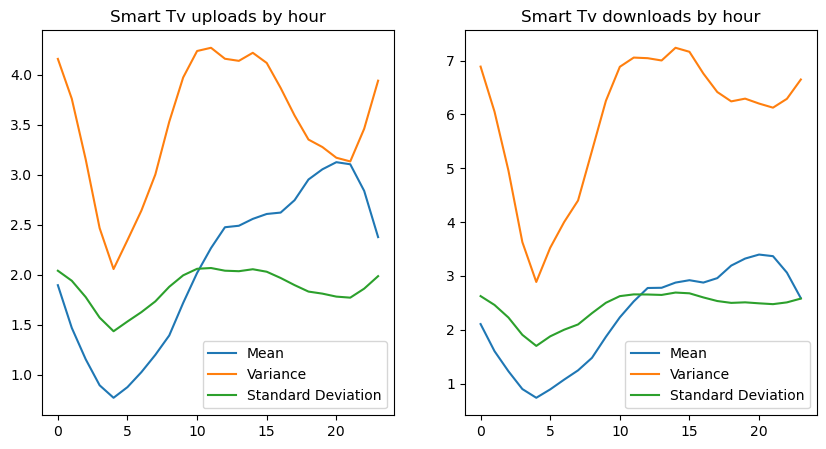

In [23]:
plt.figure(figsize= [10, 5])

smart_tv_by_hour = smart_tv_data.groupby('hour')

plt.subplot(1,2,1)
plt.title('Smart Tv uploads by hour')
plt.plot(smart_tv_by_hour['bytes_up'].mean(), label= 'Mean');
plt.plot(smart_tv_by_hour['bytes_up'].var(), label= 'Variance');
plt.plot(smart_tv_by_hour['bytes_up'].std(), label= 'Standard Deviation');
plt.legend();

plt.subplot(1,2,2)
plt.title('Smart Tv downloads by hour')
plt.plot(smart_tv_by_hour['bytes_down'].mean(), label= 'Mean');
plt.plot(smart_tv_by_hour['bytes_down'].var(), label= 'Variance');
plt.plot(smart_tv_by_hour['bytes_down'].std(), label= 'Standard Deviation');
plt.legend();

## Horários com maior valor de tráfego

#### Horários com as maiores médias das taxas de upload e download em uma hora, Chromecast

In [24]:
chromecast_hour_up = chromecast_by_hour['bytes_up'].mean().idxmax()
chromecast_hour_down = chromecast_by_hour['bytes_down'].mean().idxmax()

chromecast_value_up = chromecast_by_hour['bytes_up'].mean().max()
chromecast_value_down = chromecast_by_hour['bytes_down'].mean().max()

chromecast_mean_up = chromecast_data[chromecast_data['hour'] == chromecast_hour_up][["hour", "bytes_up", "bytes_down"]]
chromecast_mean_down = chromecast_data[chromecast_data['hour'] == chromecast_hour_down][["hour", "bytes_up", "bytes_down"]]

print(f'O horário com maior média da taxa de upload é {chromecast_hour_up}h com média {chromecast_value_up:.3f}')
print(f'O horário com maior média da taxa de download é {chromecast_hour_down}h com média {chromecast_value_down:.3f}')

O horário com maior média da taxa de upload é 22h com média 3.522
O horário com maior média da taxa de download é 23h com média 4.053


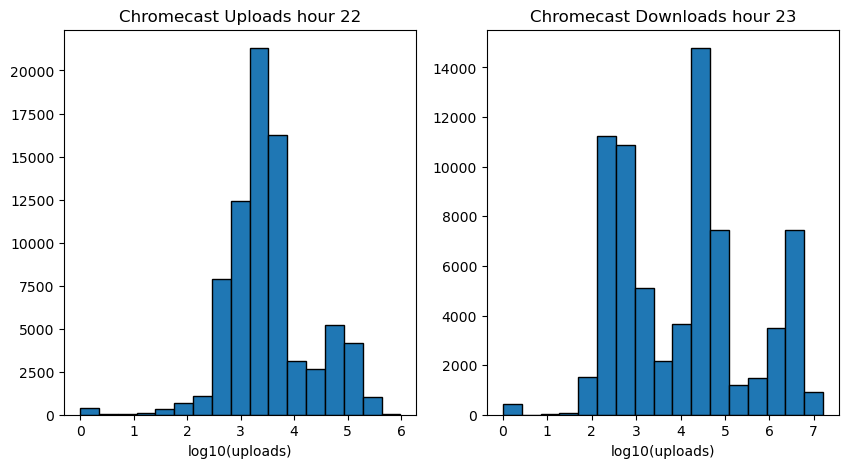

In [25]:
plt.figure(figsize= [10, 5])

plt.subplot(1, 2, 1)
plt.title(f'Chromecast Uploads hour {chromecast_hour_up}')
plt.xlabel('log10(uploads)')
data_3 = chromecast_data[chromecast_data['hour'] == chromecast_hour_up]
bins = calculate_bins(chromecast_mean_up['bytes_up'])
plt.hist(data= chromecast_mean_up, x = 'bytes_up', bins = bins, edgecolor = "black");

plt.subplot(1, 2, 2)
plt.title(f'Chromecast Downloads hour {chromecast_hour_down}')
plt.xlabel('log10(uploads)')
data_4 = chromecast_data[chromecast_data['hour'] == chromecast_hour_down]
bins = calculate_bins(chromecast_mean_down['bytes_down'])
plt.hist(data= chromecast_mean_down, x = 'bytes_down', bins = bins, edgecolor = "black");

####  Horários com as maiores médias das taxas de upload e download em uma hora, Smart TV

In [26]:
smart_tv_hour_up = smart_tv_by_hour['bytes_up'].mean().idxmax()
smart_tv_hour_down = smart_tv_by_hour['bytes_down'].mean().idxmax()

smart_tv_value_up = smart_tv_by_hour['bytes_up'].mean().max()
smart_tv_value_down = smart_tv_by_hour['bytes_down'].mean().max()

smart_tv_mean_up = smart_tv_data[smart_tv_data['hour'] == smart_tv_hour_up][["hour", "bytes_up", "bytes_down"]]
smart_tv_mean_down = smart_tv_data[smart_tv_data['hour'] == smart_tv_hour_down][["hour", "bytes_up", "bytes_down"]]

print(f'O horário com maior média da taxa de upload é {smart_tv_hour_up}h com média {smart_tv_value_up:.3f}')
print(f'O horário com maior média da taxa de download é {smart_tv_hour_down}h com média {smart_tv_value_down:.3f}')

O horário com maior média da taxa de upload é 20h com média 3.124
O horário com maior média da taxa de download é 20h com média 3.396


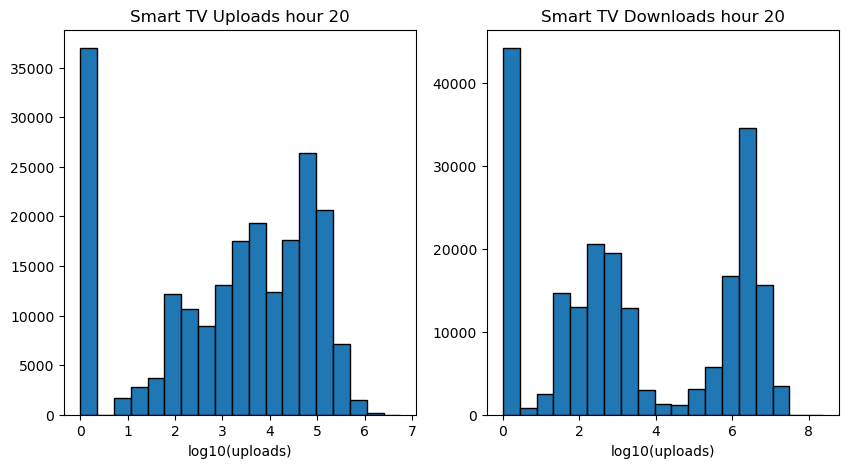

In [27]:
plt.figure(figsize= [10, 5])

plt.subplot(1, 2, 1)
plt.title(f'Smart TV Uploads hour {smart_tv_hour_up}')
plt.xlabel('log10(uploads)')
bins = calculate_bins(smart_tv_mean_up['bytes_up'])
plt.hist(data= smart_tv_mean_up, x = 'bytes_up', bins = bins, edgecolor = "black");

plt.subplot(1, 2, 2)
plt.title(f'Smart TV Downloads hour {smart_tv_hour_down}')
plt.xlabel('log10(uploads)')
bins = calculate_bins(smart_tv_mean_down['bytes_down'])
plt.hist(data= smart_tv_mean_down, x = 'bytes_down', bins = bins, edgecolor = "black");

## QQPlots

#### Comparação dos datasets 1 e 3 (Upload)

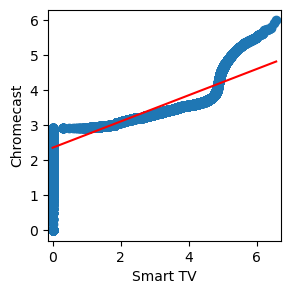

In [28]:
with plt.rc_context():
    plt.rc("figure", figsize=(3,3))
    sm.qqplot_2samples(smart_tv_mean_up['bytes_up'], chromecast_mean_up['bytes_up'], xlabel='Smart TV', ylabel= 'Chromecast', line='r');

#### Comparação dos datasets 2 e 4

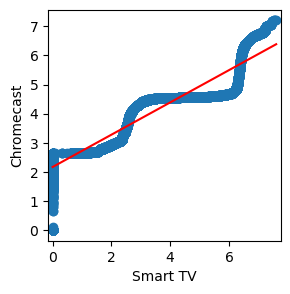

In [29]:
with plt.rc_context():
    plt.rc("figure", figsize=(3,3))
    sm.qqplot_2samples(smart_tv_mean_down['bytes_down'], chromecast_mean_down['bytes_down'], xlabel='Smart TV', ylabel= 'Chromecast', line='r');

## Análise da correlação entre as taxas de upload e download para os horários com o maior valor de tráfego

In [30]:
# Adaptação da função pearsonr para suportar entradas de dois conjuntos com números de dados diferentes
def pearson_r(x, y):
    if len(x) == len(y):
        r = pearsonr(x, y)[0]
    elif len(x) > len(y):
        x = np.random.choice(x, len(y), replace= False)
        r = pearsonr(x, y)[0]
    else:
        y = np.random.choice(y, len(x), replace= False)
        r = pearsonr(x, y)[0]
    return r, x, y

### Chromecast

In [31]:
r, x, y = pearson_r(chromecast_mean_up['bytes_up'], chromecast_mean_down['bytes_down'])
print(f'O coeficiente de correlação amostral para o Chromecast é {r:.3f}')

O coeficiente de correlação amostral para o Chromecast é -0.002


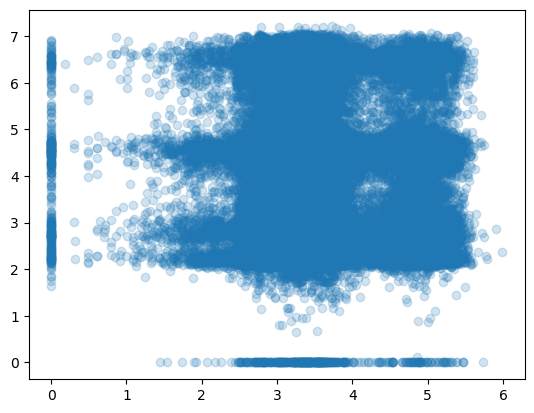

In [32]:
plt.scatter(x, y, alpha= 0.2);

### Smart TV

In [33]:
r, x, y = pearson_r(smart_tv_mean_up['bytes_up'], smart_tv_mean_down['bytes_down'])
print(f'O coeficiente de correlação amostral para a Smart TV é {r:.3f}')

O coeficiente de correlação amostral para a Smart TV é 0.916


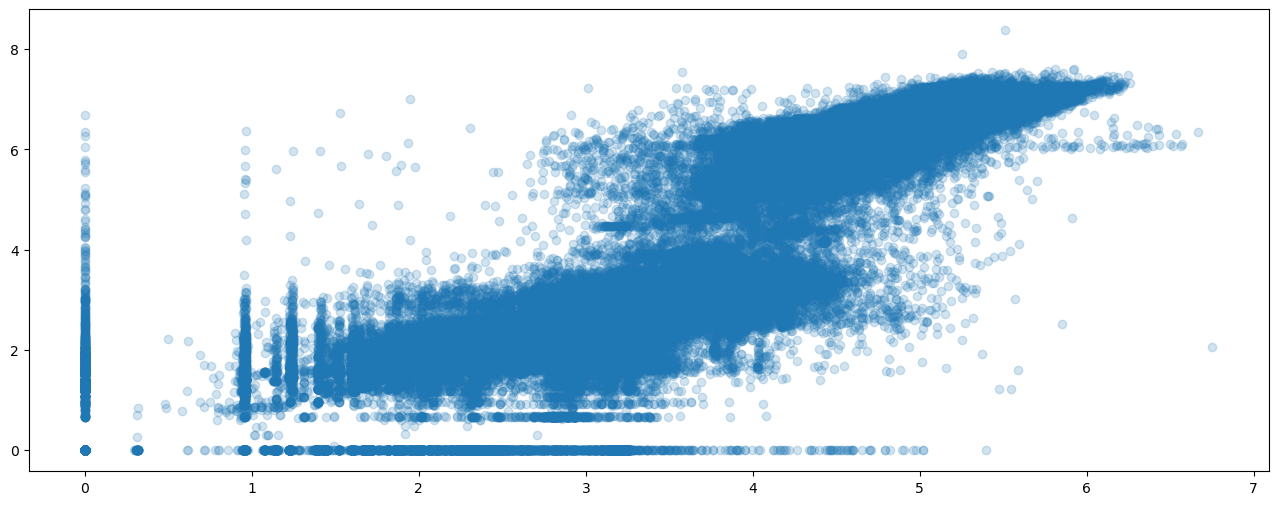

In [34]:
plt.figure(figsize=[16, 6])
plt.scatter(x, y, alpha= 0.2);